# PROBLEM STATEMENT

Predict the Bidding outcome.

a) IT firms compete for winning large deals by designing and proposing solutions to their clients. The deal value can reach up to millions of dollars, which leads to highly competitive bidding processes. Even a marginal improvement in the win rate can result into substantial revenue addition for IT firm.

b) By predicting the probability of winning a deal, the engagement teams can prioritize the pipeline of opportunities to staff the most attractive options first. With the probability of winning known in advance, deal engagement manager can ensure that for the most profitable deals there are resources available.

c) Identify the best bid manager-SBU Head combination who can convert an opportunity to win with the provided data points.
 
d) Predictive Analytics - Build a ML model to predict the probability of win/loss for bidding activities for a potential client.

## Importing Libraries

In [38]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

In [2]:
#setting directory
os.chdir('D:\\projects\\Win Prediction')

In [3]:
os.listdir()

['DataDictionary-Win_Prediction.xlsx',
 'Win Prediction Analytics.pdf',
 'Win_Prediction_Data.xlsx']

In [4]:
win=pd.read_excel('Win_Prediction_Data.xlsx')

In [5]:
win.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


## Data Cleaning

In [6]:
# dataset info about features and rows`
win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [7]:
#description of numeric data
win.describe()


,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


In [8]:
# displaying duplicate records in dataset
print("no. of duplicate records :",win.duplicated().sum(), "duplicate records ")

no. of duplicate records : 14 duplicate records 


In [9]:
# checking duplicate records
win[win.duplicated()]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
3036,Domestic Public Bank,Solution 32,2015-03-20,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,Lost
3385,Tech,Solution 32,2015-07-31,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,Lost
3880,Telecom,Solution 12,2013-08-30,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,Lost
5037,Tech,Solution 13,2012-05-08,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,Lost
7637,Govt,Solution 34,2018-02-21,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,Lost
7705,Internal,Solution 9,2015-01-06,Sector 20,Others,Sargar Deep Rao,Brenton Launius,2120294.12,Lost
7718,Services_based,Solution 26,2018-02-11,Sector 17,L10,Molly Eakes,vansu dev,264705.88,Lost
8020,Internal,Solution 9,2015-07-02,Sector 2,L9,Sargar Deep Rao,Rahul Kocher,264705.88,Lost
8167,Infrastructure,Solution 9,2015-05-18,Sector 24,L10,Mervin Harwood,nahar singh,352941.18,Lost
8177,Services_based,Solution 9,2015-10-03,Sector 23,L1,Ankita Aggarwal,bhagwati prasad,147058.82,Lost


In [10]:
# remove duplicate records
win.drop_duplicates(inplace=True)

In [11]:
win.duplicated().sum()   # no duplicated left

0

In [12]:
# checking missing values in each category
win.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [13]:
# checking the client category missing values
df=win[win["Client Category"].isnull()]
df

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
488,NaN,Solution 7,2018-10-05,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost
491,NaN,Solution 7,2019-01-06,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost
518,NaN,Solution 10,2012-01-12,Sector 19,L10,Mangesh K. Singh,Hardeep Suksma,38235.29,Won
732,NaN,Solution 10,2013-11-08,Sector 23,L10,Rosanna Maynez,Sohil Kumar,58823.53,Won
1128,NaN,Solution 37,2013-09-27,Sector 24,L10,Mervin Harwood,Marcelo Riles,311764.71,Lost
...,...,...,...,...,...,...,...,...,...
9477,NaN,Solution 32,2018-09-26,Sector 23,L10,Long Bergstrom,Md Irshad,588235.29,Lost
9753,NaN,Solution 9,2018-08-04,Sector 19,L10,Gopa Trilochana,Darla Dickinson,485294.12,Won
9819,NaN,Solution 9,2018-09-15,Sector 19,L10,Clinton Mani,Sanchita Gulati,720588.24,Won
9904,NaN,Solution 14,2018-11-29,Sector 12,L10,Mangesh K. Singh,keshar ansari,529411.77,Won


In [14]:
# % of  missing value
win["Client Category"].isnull().mean()

0.007863043694635214

In [15]:
win["Deal Status Code"].value_counts()

Lost    6292
Won     3755
Name: Deal Status Code, dtype: int64

In [16]:
# deal status where client category is missing
df["Deal Status Code"].value_counts()

Lost    58
Won     21
Name: Deal Status Code, dtype: int64

In [17]:
win["Client Category"].value_counts(dropna=False)

Others                   1762
Internal                 1451
Services_based           1200
Tech                      911
Domestic Public Bank      418
International Bank        375
Consulting                352
Finance                   339
Telecom                   326
Power ind                 264
Domestic Private Bank     261
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            151
Domestic Bank             134
Retail_market             126
Govt                      120
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
NaN                        79
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce

In [18]:
win["Client Category"].isnull().sum()

79

In [19]:
win["Solution Type"].value_counts(dropna=False)

Solution 32    1437
Solution 9     1411
Solution 10    1016
Solution 39     585
Solution 67     584
               ... 
Solution 66       1
Solution 57       1
Solution 56       1
Solution 19       1
Solution 60       1
Name: Solution Type, Length: 67, dtype: int64

<AxesSubplot:>

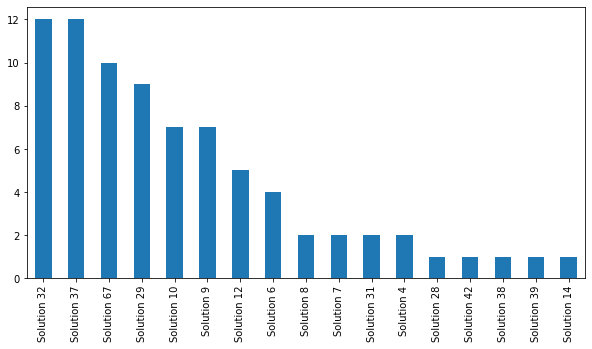

In [24]:
df['Solution Type'].value_counts().plot.bar(figsize=(10,5))

In [20]:
win["Sector"].value_counts(dropna=False)

Sector 23    2690
Sector 2     1743
Sector 20     771
Sector 12     607
Sector 24     576
Sector 16     474
Sector 17     473
Sector 15     387
Sector 9      369
Sector 25     273
Sector 18     251
Sector 1      231
Sector 13     185
Sector 22     144
Sector 19     142
Sector 3      135
Sector 4      127
Sector 11     114
Sector 14     109
Sector 6       96
Sector 5       64
Sector 8       39
Sector 21      30
Sector 7       14
Sector 10       3
Name: Sector, dtype: int64

<AxesSubplot:>

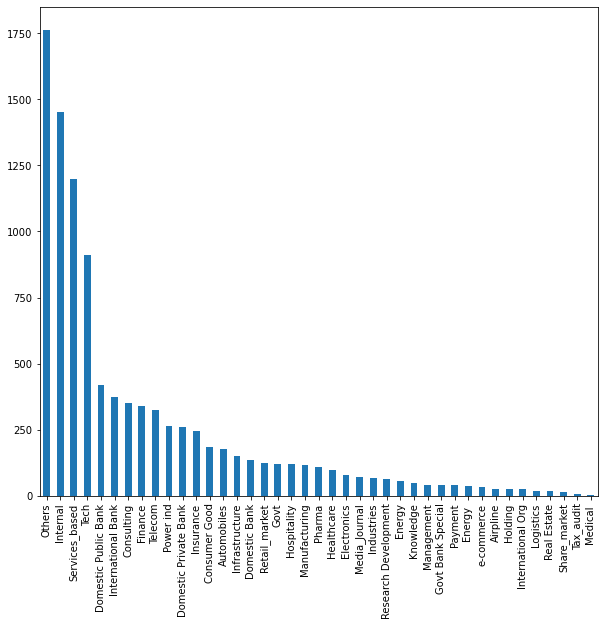

In [21]:
# visualising cleint category to see the most occuring type
win["Client Category"].value_counts().plot.bar(figsize=(10,9))

In [23]:
# therefore we will replace value with others category

In [25]:
#replacing value with Others
win["Client Category"] = win["Client Category"].fillna("Others")       

In [26]:
win.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

## Deal cost zero and outliers treatment

In [27]:
#looking for o deal cost(dl)
dl = win.loc[ (win["Deal Cost"]==0.0)]
dl

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
79,Govt,Solution 37,2011-11-20,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
95,Others,Solution 31,2011-11-07,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
139,Govt,Solution 37,2012-02-06,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
150,Others,Solution 31,2012-03-23,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
210,Domestic Public Bank,Solution 59,2012-06-12,Sector 2,L10,Mervin Harwood,Lino Batterton,0.0,Lost
...,...,...,...,...,...,...,...,...,...
7886,Retail_market,Solution 9,2014-11-24,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,Lost
7903,Tech,Solution 9,2015-05-31,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost
7907,Tech,Solution 9,2014-12-21,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost
7921,Retail_market,Solution 9,2014-12-21,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,Lost


<AxesSubplot:>

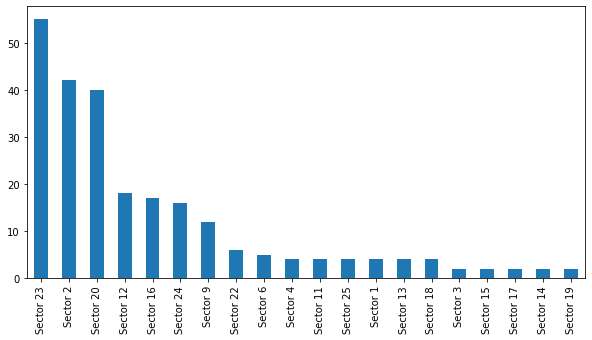

In [29]:
# looking for sector where deal cost is zero
dl['Sector'].value_counts().plot.bar(figsize=(10,5))

<AxesSubplot:>

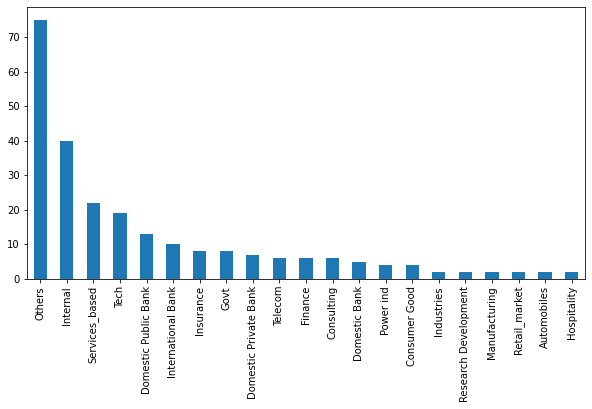

In [30]:
dl['Client Category'].value_counts().plot.bar(figsize=(10,5))

In [32]:
#Finding median value of ;low cost deals
win['Deal Cost'].median()

382352.94

In [33]:
# replacing deal cost 0 with median 
win["Deal Cost"]=np.where((win["Deal Cost"]==0.0), 382352.94, win["Deal Cost"])

In [35]:
#checking if 0.0 values replaced in data
win[(win['Deal Cost']==0.0)]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code


In [36]:
#Statistical Summery of numeric values
win.describe(percentiles=[0.01, 0.02, 0.03, 0.05, 0.1, 0.25, 0.50, 0.75, 0.95, 0.96,0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,50%,75%,95%,96%,97%,98%,99%,max
Deal Cost,10047.0,776620.150438,1.617537e+06,294.12,1470.59,14705.88,38458.8212,65352.941,110294.12,205882.35,382352.94,764705.88,2558823.53,2882352.94,3258529.41,4.442176e+06,6.829506e+06,36764705.88


<AxesSubplot:xlabel='Deal Cost', ylabel='Density'>

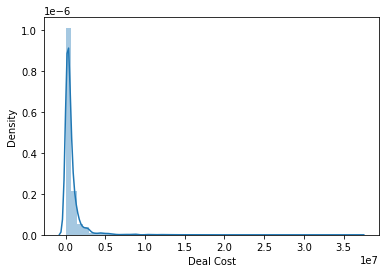

In [39]:
#data distribution of deal cost
sns.distplot(win['Deal Cost'])

<AxesSubplot:xlabel='Deal Cost'>

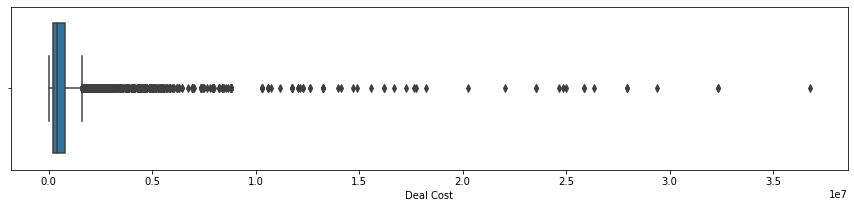

In [40]:
#checking outliers
fig, ax = plt.subplots(figsize = (15,3))
sns.boxplot(x = 'Deal Cost', data = win, showfliers = True)

In [41]:
# treating outliers through IOR method
Q1=205882.35    
Q3= 764705.88
QIR= Q3-Q1
QIR

558823.53

In [42]:
print ("lower fence" ,Q1-(1.5*(QIR)))

lower fence -632352.9450000001


In [43]:
print ("upper fence" ,Q3+(1.5*(QIR)))

upper fence 1602941.175


In [44]:
win["Deal Cost"][win["Deal Cost"]>=1602941.175] =1602941.175

<AxesSubplot:xlabel='Deal Cost'>

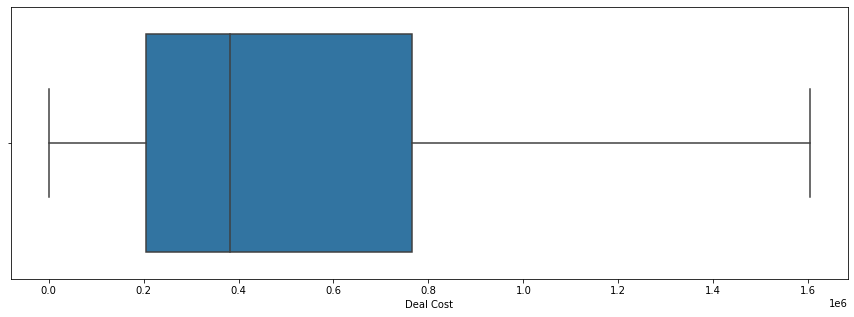

In [45]:
# checking outliers again 
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(x = 'Deal Cost', data = win, showfliers = True)

In [47]:
win.astype('object').describe().T

,count,unique,top,freq
Client Category,10047,41,Others,1841
Solution Type,10047,67,Solution 32,1437
Deal Date,10047,2555,2018-01-31 00:00:00,15
Sector,10047,25,Sector 23,2690
Location,10047,13,L10,3355
VP Name,10047,43,Mervin Harwood,1163
Manager Name,10047,278,Molly Eakes,323
Deal Cost,10047.0,1165.0,1602941.175,933.0
Deal Status Code,10047,2,Lost,6292


## Exploratory Data Analysis

### univariate

In [48]:
#unique count of target variable
win["Deal Status Code"].value_counts(dropna=False)

Lost    6292
Won     3755
Name: Deal Status Code, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Client Category'>

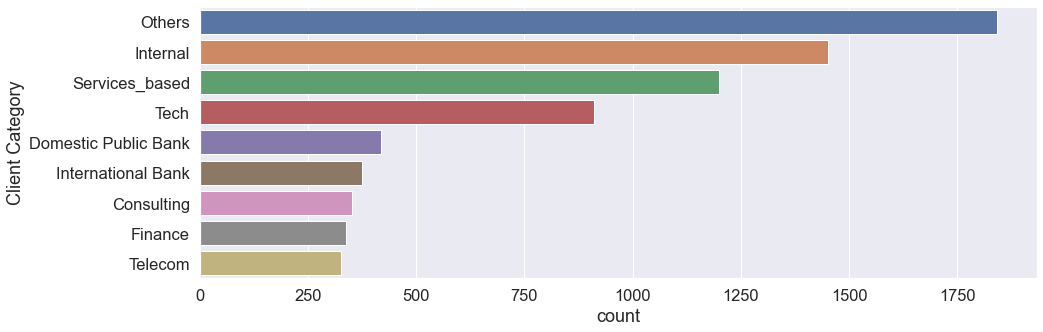

In [49]:
#client category visualization
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,5))
sns.countplot(y="Client Category", data=win ,
              order=win['Client Category'].value_counts().iloc[0:9].index)

<AxesSubplot:xlabel='count', ylabel='Solution Type'>

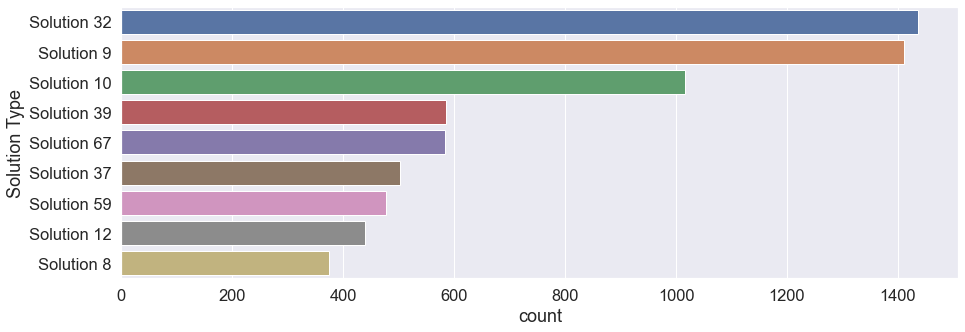

In [50]:
#solution type
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,5))
sns.countplot(y="Solution Type", data=win,
              order=win['Solution Type'].value_counts().iloc[0:9].index)

<AxesSubplot:xlabel='count', ylabel='Sector'>

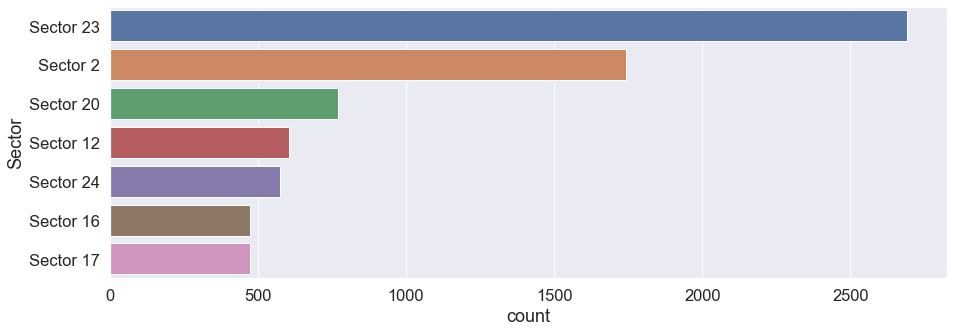

In [51]:
#sector
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,5))
sns.countplot(y="Sector", data=win,
              order=win['Sector'].value_counts().iloc[0:7].index)

<AxesSubplot:xlabel='count', ylabel='Location'>

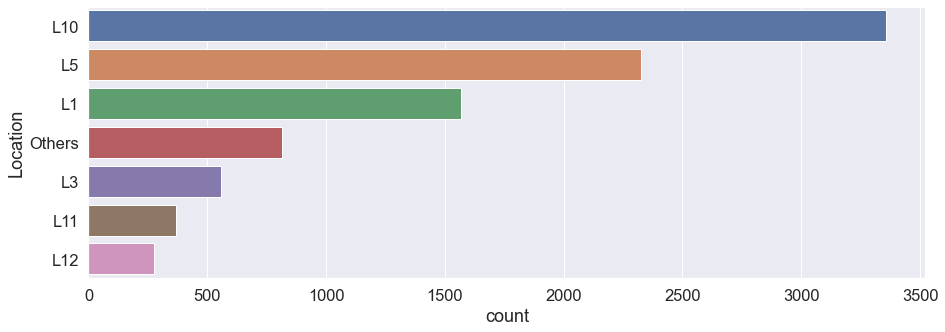

In [52]:
#location
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,5))
sns.countplot(y="Location", data=win,
              order=win['Location'].value_counts().iloc[0:7].index)

<AxesSubplot:xlabel='count', ylabel='VP Name'>

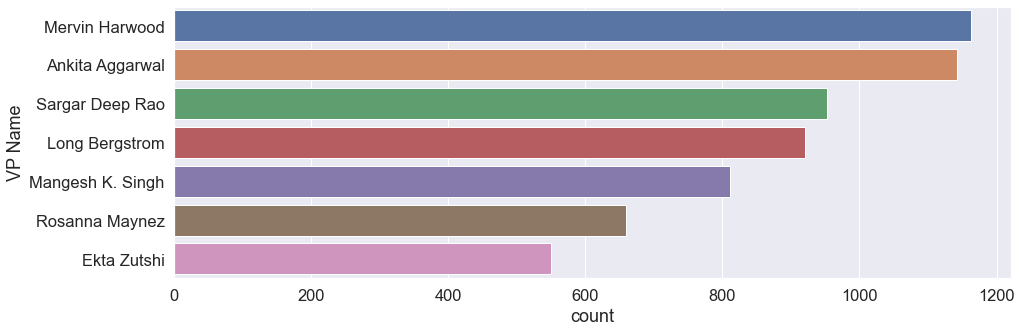

In [53]:
#VP name
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,5))
sns.countplot(y="VP Name", data=win,
              order=win['VP Name'].value_counts().iloc[0:7].index)

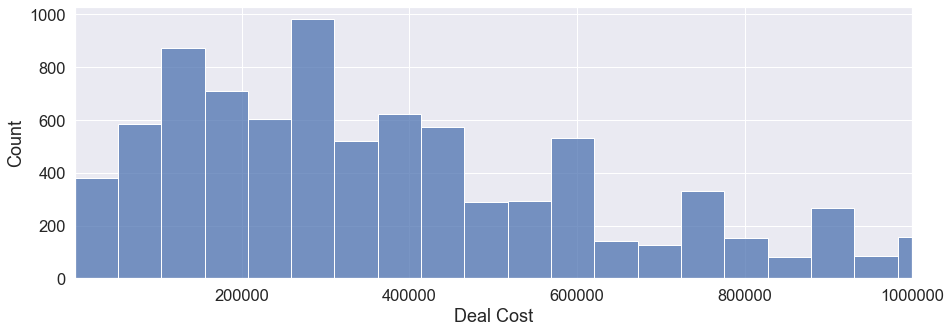

In [54]:
#distribution of deal cost
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(x='Deal Cost',data=win, ax=ax)
ax.set_xlim(1000,1000000)
ax.ticklabel_format(style='plain', axis='x')
plt.show()

## Bivariate Analysis with Deal Cost

--**VP Name**

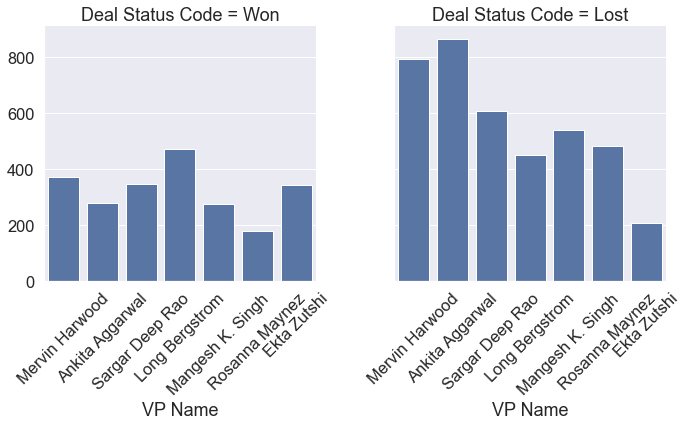

In [55]:
g = sns.FacetGrid(win,col="Deal Status Code",height=5)
g.map(sns.countplot, 'VP Name',order = win['VP Name'].value_counts().iloc[0:7].index)
g.set_xticklabels(rotation=45) 
plt.show()

--**client category**

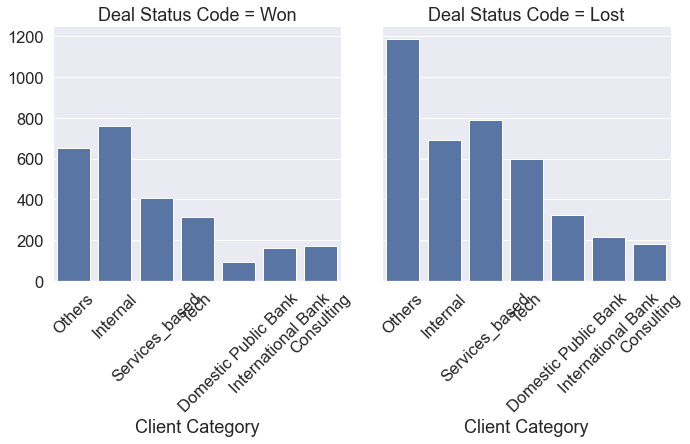

In [56]:
g = sns.FacetGrid(win,col="Deal Status Code",height=5)
g.map(sns.countplot, 'Client Category',order = win['Client Category'].value_counts().iloc[0:7].index)
g.set_xticklabels(rotation=45) 
plt.show()

--**Manager**

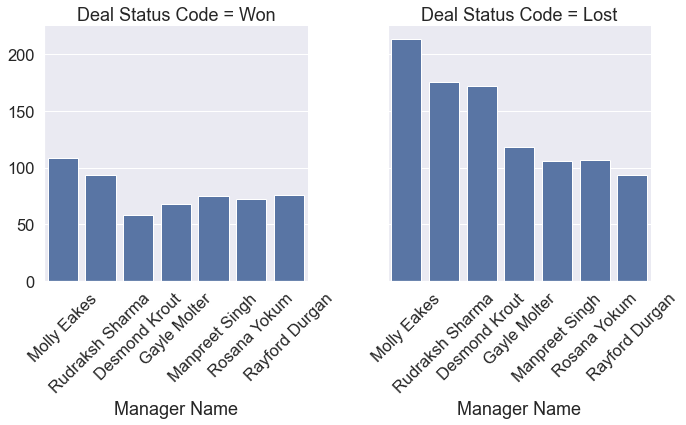

In [57]:
g = sns.FacetGrid(win,col="Deal Status Code",height=5)
g.map(sns.countplot, 'Manager Name',order = win['Manager Name'].value_counts().iloc[0:7].index)
g.set_xticklabels(rotation=45) 
plt.show()

--**Distribution of Deal Cost with deal status**

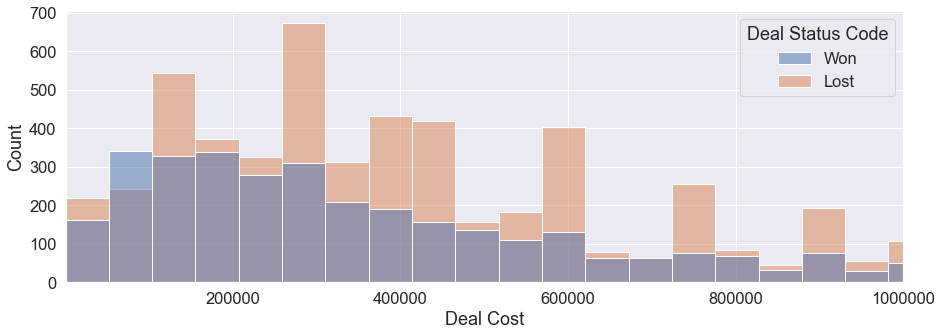

In [58]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(x='Deal Cost',hue = 'Deal Status Code',data=win, ax=ax,fill=True)
ax.set_xlim(1000,1000000)
ax.ticklabel_format(style='plain', axis='x')
plt.show()


<AxesSubplot:xlabel='Deal Status Code', ylabel='Deal Cost'>

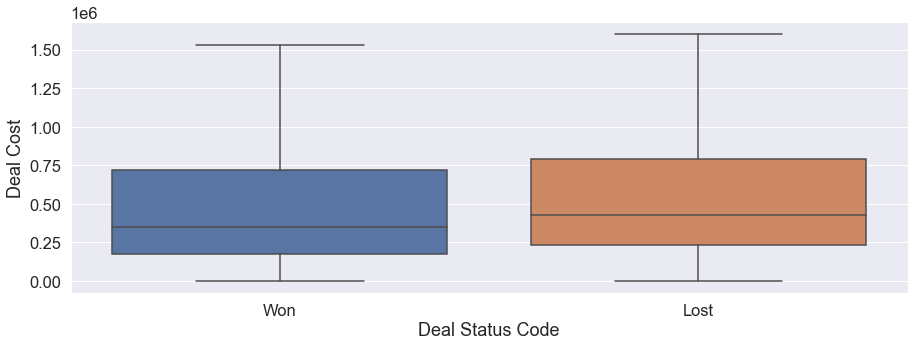

In [59]:
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(y = 'Deal Cost',x='Deal Status Code', data = win, showfliers = False)

In [60]:
win.nunique()

Client Category       41
Solution Type         67
Deal Date           2555
Sector                25
Location              13
VP Name               43
Manager Name         278
Deal Cost           1165
Deal Status Code       2
dtype: int64

In [61]:
# Get deal status count-Lost & Won
win['Deal Status Code'].value_counts()

Lost    6292
Won     3755
Name: Deal Status Code, dtype: int64

In [62]:
def without_hue (plot, feature):
    total=len(feature)
    for p in plot.patches:
        percentage='{:.0f}%'.format(100* p.get_height()/total)
        x=p.get_x()+p.get_width()/2-0.05
        y=p.get_y()+p.get_height()
        ax.annotate(percentage,(x,y),size=12)
    plt.show()

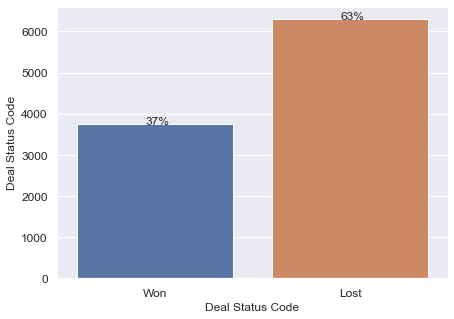

In [63]:
plt.figure(figsize=(7,5))
ax=sns.countplot('Deal Status Code',data=win)
plt.xticks(size=12)
plt.xlabel('Deal Status Code',size=12)
plt.yticks(size=12)
plt.ylabel('Deal Status Code',size=12)

without_hue(ax, win['Deal Status Code'])

In [64]:
win

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.000,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.880,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.350,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.820,Won
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,1602941.175,Won


In [65]:
#count of each column
win["Client Category"].value_counts(dropna=False)

Others                   1841
Internal                 1451
Services_based           1200
Tech                      911
Domestic Public Bank      418
International Bank        375
Consulting                352
Finance                   339
Telecom                   326
Power ind                 264
Domestic Private Bank     261
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            151
Domestic Bank             134
Retail_market             126
Govt                      120
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [66]:
#Win percentage of Client Category column
Win_Ratio=pd.crosstab(win['Client Category'],win['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Client Category,,,,
Share_market,4,10,14,71.428571
Internal,691,760,1451,52.377671
Management,22,21,43,48.837209
Consulting,182,170,352,48.295455
Consumer Good,98,87,185,47.027027
Holding,14,11,25,44.000000
Energy,32,25,57,43.859649
International Bank,215,160,375,42.666667
Power ind,152,112,264,42.424242


In [67]:
win["Solution Type"].value_counts()

Solution 32    1437
Solution 9     1411
Solution 10    1016
Solution 39     585
Solution 67     584
               ... 
Solution 66       1
Solution 57       1
Solution 56       1
Solution 19       1
Solution 60       1
Name: Solution Type, Length: 67, dtype: int64

In [68]:
# Win ratio of solution type
Win_Ratio=pd.crosstab(win['Solution Type'],win['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Solution Type,,,,
Solution 24,0,5,5,100.000000
Solution 19,0,1,1,100.000000
Solution 66,0,1,1,100.000000
Solution 64,0,1,1,100.000000
Solution 60,0,1,1,100.000000
Solution 57,0,1,1,100.000000
Solution 56,0,1,1,100.000000
Solution 18,0,1,1,100.000000
Solution 30,12,62,74,83.783784


In [69]:
win["Sector"].value_counts()

Sector 23    2690
Sector 2     1743
Sector 20     771
Sector 12     607
Sector 24     576
Sector 16     474
Sector 17     473
Sector 15     387
Sector 9      369
Sector 25     273
Sector 18     251
Sector 1      231
Sector 13     185
Sector 22     144
Sector 19     142
Sector 3      135
Sector 4      127
Sector 11     114
Sector 14     109
Sector 6       96
Sector 5       64
Sector 8       39
Sector 21      30
Sector 7       14
Sector 10       3
Name: Sector, dtype: int64

In [70]:
# Win percentage acc to sectors
Win_Ratio=pd.crosstab(win['Sector'],win['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Sector,,,,
Sector 21,10,20,30,66.666667
Sector 7,6,8,14,57.142857
Sector 20,382,389,771,50.453956
Sector 9,202,167,369,45.257453
Sector 17,273,200,473,42.283298
Sector 19,84,58,142,40.845070
Sector 15,234,153,387,39.534884
Sector 23,1637,1053,2690,39.144981
Sector 24,358,218,576,37.847222


In [72]:
win["Location"].value_counts()

L10       3355
L5        2327
L1        1570
Others     814
L3         556
L11        367
L12        276
L9         239
L7         237
L4         187
L6         100
L8          11
L2           8
Name: Location, dtype: int64

In [73]:
# Win percentage acc to LOcation
Win_Ratio=pd.crosstab(win['Location'],win['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False)

Deal Status Code,Lost,Won,Total,Win%
Location,,,,
Others,423,391,814,48.034398
L1,910,660,1570,42.038217
L5,1391,936,2327,40.223464
L11,232,135,367,36.784741
L3,356,200,556,35.971223
L12,178,98,276,35.507246
L10,2225,1130,3355,33.681073
L4,125,62,187,33.155080
L6,70,30,100,30.000000


In [74]:
win["VP Name"].value_counts()

Mervin Harwood         1163
Ankita Aggarwal        1142
Sargar Deep Rao         953
Long Bergstrom          920
Mangesh K. Singh        811
Rosanna Maynez          659
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          207
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Alam Syed               126
Molly Eakes             125
Gaurav Sameria          114
Varsha Arora            104
Gayle Molter            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Rahul Kocher             32
Marcella Mo              32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

In [75]:
# Win ratio acc to VP
Win_Ratio=pd.crosstab(win['VP Name'],win['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
VP Name,,,,
Ekta Zutshi,206,344,550,62.545455
Prashant Rawat,12,15,27,55.555556
Vikram Rawat,8,9,17,52.941176
Long Bergstrom,449,471,920,51.195652
Alam Syed,62,64,126,50.793651
Molly Eakes,65,60,125,48.000000
Lilli Storrs,14,12,26,46.153846
neeraj kumar,254,217,471,46.072187
Man Suddeth,16,13,29,44.827586


In [77]:
win["Manager Name"].value_counts()

Molly Eakes        323
Rudraksh Sharma    270
Desmond Krout      230
Gayle Molter       186
Manpreet Singh     181
                  ... 
Rishab Bhatt         1
Sumit Arora          1
Brenton Launius      1
Ike Deppen           1
Sultan Khan          1
Name: Manager Name, Length: 278, dtype: int64

In [78]:
# Win percentage acc to Manager_Name
Win_Ratio=pd.crosstab(win['Manager Name'],win['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Manager Name,,,,
Aastha Gandhi,0,1,1,100.0
Anish Jonson,0,1,1,100.0
Vaibhav Somaskandan,0,2,2,100.0
Uzaar Ali,0,1,1,100.0
Upendra Bhatt,0,5,5,100.0
Taran Singh,0,1,1,100.0
Sumita Verma,0,2,2,100.0
Sumit Arora,0,1,1,100.0
Sultan Khan,0,1,1,100.0


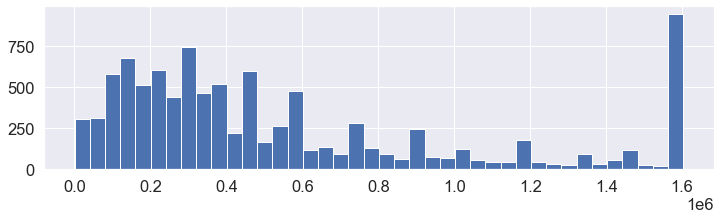

In [79]:
# This plot representing most of deals are below $0.5M
win['Deal Cost'].hist(bins=40,figsize=(12,3));

In [81]:
win["Deal Cost"].value_counts()

1602941.175    933
294117.650     506
588235.290     388
441176.470     377
147058.820     362
              ... 
442647.060       1
404705.880       1
91764.710        1
84411.770        1
223823.530       1
Name: Deal Cost, Length: 1165, dtype: int64

In [82]:
#Min deal date
win['Deal Date'].min()

Timestamp('2011-04-19 00:00:00')

In [83]:
#Max Deal Date
win['Deal Date'].max()

Timestamp('2019-06-07 00:00:00')

In [84]:
# Adding Year and month column
from datetime import datetime
#data['Month Year']=data['Deal Date'].apply(lambda x: x.strftime('%Y-%m'))
win['Deal Year'] = pd.DatetimeIndex(win['Deal Date']).year
win['Deal Month'] = pd.DatetimeIndex(win['Deal Date']).month
win

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.000,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.880,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.350,Lost,2011,6
...,...,...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost,2019,3
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.820,Won,2019,3
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost,2019,2
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,1602941.175,Won,2019,1


In [85]:
def without_hue (plot, feature):
    total=len(feature)
    for p in plot.patches:
        percentage='{:.0f}%'.format(100* p.get_height()/total)
        x=p.get_x()+p.get_width()/2-0.05
        y=p.get_y()+p.get_height()
        ax.annotate(percentage,(x,y),size=12)
    plt.show()

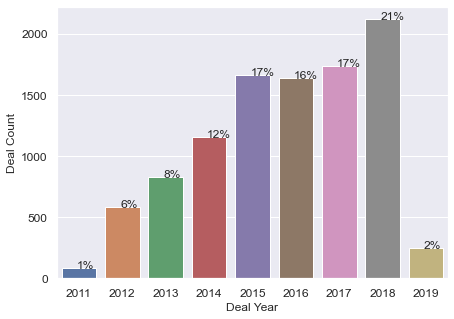

In [87]:
plt.figure(figsize=(7,5))
ax=sns.countplot('Deal Year',data=win)
plt.xticks(size=12)
plt.xlabel('Deal Year',size=12)
plt.yticks(size=12)
plt.ylabel('Deal Count',size=12)

without_hue(ax, win['Deal Year'])

<AxesSubplot:>

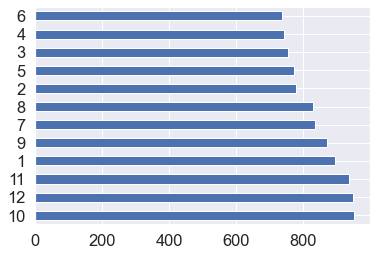

In [89]:
# Waterfall acc to Monthly sales
win['Deal Month'].value_counts()[:20].plot(kind='barh')

In [91]:
win.groupby(['Deal Year','Deal Month'])['Deal Cost'].sum()

Deal Year  Deal Month
2011       4             6.923529e+05
           5             8.088235e+04
           6             8.088235e+04
           7             6.323529e+05
           8             6.000000e+04
                             ...     
2019       2             2.854647e+07
           3             3.213235e+07
           4             9.582059e+06
           5             5.340294e+06
           6             5.588235e+05
Name: Deal Cost, Length: 98, dtype: float64

In [93]:
#year wise won & lost
pd.crosstab(win['Deal Year'],win['Deal Status Code'])

Deal Status Code,Lost,Won
Deal Year,,
2011,44,41
2012,319,262
2013,465,363
2014,755,402
2015,1149,514
2016,1065,570
2017,1088,649
2018,1274,843
2019,133,111


In [94]:
def barPerc(df,xVar,ax):
    numX=len([x for x in win[xVar].unique() if x==x])
    bars=ax.patches
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total=sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,bar.get_height(),f'{bar.get_height()/total:.0%}',ha="center",va="bottom")
        

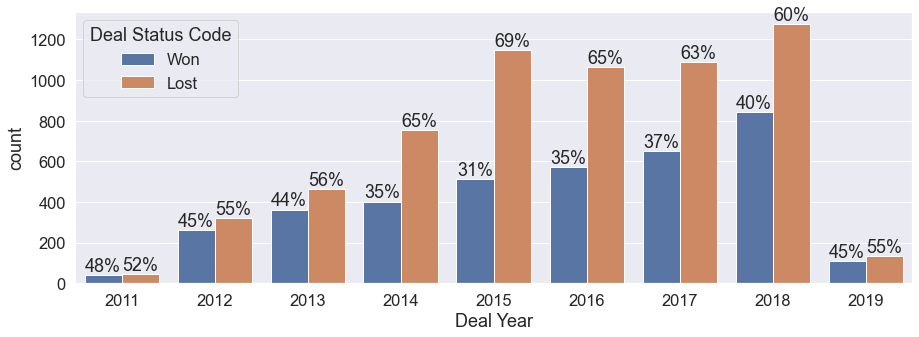

In [95]:
plt.figure(figsize=[15,5])
ax=sns.countplot(x='Deal Year',hue='Deal Status Code',data=win)
barPerc(win,'Deal Year',ax)

In [96]:
pd.crosstab(win['Deal Month'],win['Deal Status Code'])

Deal Status Code,Lost,Won
Deal Month,,
1,555,340
2,499,279
3,464,289
4,486,257
5,443,330
6,461,276
7,530,305
8,499,328
9,545,326


<AxesSubplot:>

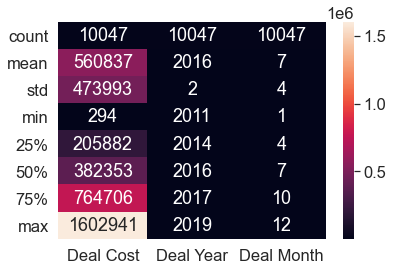

In [97]:
# Visuals of stats of whole dataset
sns.heatmap(win.describe(), annot = True, fmt = '0.0f')

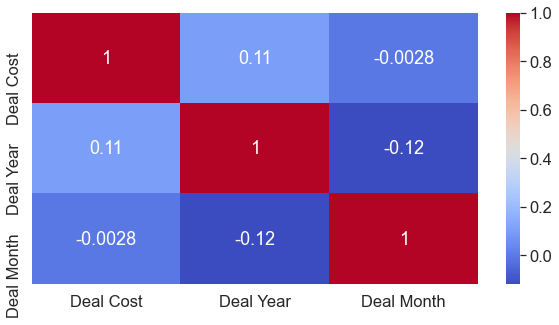

In [98]:
corr_matrix = win.corr() 

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True);

## Identifying Top 5 Bid Manager-SBU Head Combination


In [99]:
#Copy of original dataset
df1=win.copy()
df1.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


In [101]:
df1.drop('Deal Date',axis=1,inplace=True)

In [102]:
df2=df1.copy()
df2.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


In [103]:
#Combining VP name and Manager Name to create new feature named as "VP_Manager"
df2['VP Manager']=df2['VP Name']+" "+ df2['Manager Name']
df2

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.000,Won,2012,3,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.880,Won,2012,9,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost,2011,8,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost,2011,4,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.350,Lost,2011,6,Ekta Zutshi Russell Dahlen
...,...,...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost,2019,3,Rudraksh Sharma Rudraksh Sharma
10057,Internal,Solution 6,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.820,Won,2019,3,Rudraksh Sharma Sharavan Singh
10058,Power ind,Solution 9,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost,2019,2,Rudraksh Sharma Rudraksh Sharma
10059,Power ind,Solution 62,Sector 9,L5,Man Suddeth,Cleotilde Biron,1602941.175,Won,2019,1,Man Suddeth Cleotilde Biron


In [104]:
#Dropping irrelevant cols
df2.drop('VP Name',axis=1,inplace=True)
df2.drop('Manager Name',axis=1,inplace=True)

In [106]:
#final dataset
df2.head()

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,Telecom,Solution 7,Sector 24,L5,150000.00,Won,2012,3,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.88,Won,2012,9,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,60000.00,Lost,2011,8,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,60000.00,Lost,2011,4,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,80882.35,Lost,2011,6,Ekta Zutshi Russell Dahlen


In [107]:
#Calculating frequency of each VP_Manager
new_df=pd.DataFrame({'VP Manager':df2['VP Manager'].value_counts().index,'Total Deals':df2['VP Manager'].value_counts().values})
new_df

,VP Manager,Total Deals
0,Ankita Aggarwal Desmond Krout,213
1,Rahul Bajpai Rudraksh Sharma,198
2,neeraj kumar Molly Eakes,144
3,Long Bergstrom Jewell Tunstall,126
4,Sargar Deep Rao Manpreet Singh,122
...,...,...
955,Saurabh Singh Jose Gamber,1
956,Jitendra Choudhary sharat chandran,1
957,neeraj kumar Devendra Vishvakarma,1
958,Gaurav Sameria Gaurav Sameria,1


In [108]:
Won_data=df2.loc[df1['Deal Status Code']=='Won']
Won_data.head()

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,Telecom,Solution 7,Sector 24,L5,150000.00,Won,2012,3,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.88,Won,2012,9,Ekta Zutshi Gopa Trilochana
6,Internal,Solution 59,Sector 2,L10,526176.47,Won,2011,11,Mervin Harwood rahul sharma
8,Consumer Good,Solution 42,Sector 12,L10,1032352.94,Won,2012,4,Lilli Storrs Md. Daud
10,International Bank,Solution 6,Sector 2,L10,316176.47,Won,2012,2,Long Bergstrom Luv Malhotra


In [109]:
# Calculating won deals frequency 
won_win=pd.DataFrame({'VP Manager':Won_data['VP Manager'].value_counts().index,'won deals':Won_data['VP Manager'].value_counts().values})
won_win

,VP Manager,won deals
0,Long Bergstrom Russell Dahlen,75
1,Rahul Bajpai Rudraksh Sharma,72
2,neeraj kumar Molly Eakes,62
3,Ankita Aggarwal Desmond Krout,53
4,neeraj kumar Vinay Kumar,51
...,...,...
701,Ekta Zutshi nahar singh,1
702,Brendon Wycoff kailash kumar,1
703,Gayle Molter Devendra Vishvakarma,1
704,Rudraksh Sharma Vishvajeet Kumar,1


In [118]:
#Won_data['VP Manager'].value_counts().values

In [110]:
#Adding deatils in Copied New Dataset i.e new_df
new_df['won deals']=np.NaN
i=0
j=0

In [119]:
new_df

,VP Manager,Total Deals,won deals,%Win
0,Ankita Aggarwal Desmond Krout,213,53.0,NaN
1,Rahul Bajpai Rudraksh Sharma,198,72.0,NaN
2,neeraj kumar Molly Eakes,144,62.0,NaN
3,Long Bergstrom Jewell Tunstall,126,46.0,NaN
4,Sargar Deep Rao Manpreet Singh,122,42.0,NaN
...,...,...,...,...
955,Saurabh Singh Jose Gamber,1,1.0,NaN
956,Jitendra Choudhary sharat chandran,1,1.0,NaN
957,neeraj kumar Devendra Vishvakarma,1,1.0,NaN
958,Gaurav Sameria Gaurav Sameria,1,1.0,NaN


In [120]:
for i in range(won_win.shape[0]):
    for j in range(new_df.shape[0]):
        if won_win['VP Manager'].loc[i]==new_df['VP Manager'].loc[j]:
            new_df['won deals'].loc[j]=won_win['won deals'].loc[i]

In [121]:
new_df['won deals']=new_df['won deals'].replace(np.NaN,0)

In [122]:
new_df['%Win']=np.NaN
k=0

In [123]:
#Calculating Win percentage of each pair
for k in range(new_df.shape[0]):
    new_df['%Win'].loc[k]=((new_df['won deals'].loc[k]/new_df['Total Deals'].loc[k])*100)

In [124]:
new_df.head()

,VP Manager,Total Deals,won deals,%Win
0,Ankita Aggarwal Desmond Krout,213,53.0,24.882629
1,Rahul Bajpai Rudraksh Sharma,198,72.0,36.363636
2,neeraj kumar Molly Eakes,144,62.0,43.055556
3,Long Bergstrom Jewell Tunstall,126,46.0,36.507937
4,Sargar Deep Rao Manpreet Singh,122,42.0,34.426230


In [125]:
# top 5 performers but not correct
new_df=new_df.sort_values('%Win',ascending=False)
new_df.head()

,VP Manager,Total Deals,won deals,%Win
959,som dutt ram dutt gupta,1,1.0,100.0
859,Mangesh K. Singh neeraj kumar,1,1.0,100.0
840,Rahul Bajpai Royal Garofalo,1,1.0,100.0
841,Ekta Zutshi mohd shakib,1,1.0,100.0
842,Kamelesh Srinivasan Russ Vaz,1,1.0,100.0


In [126]:
#% contribution of each pair
new_df['%Contribution']=(new_df['won deals'])/(new_df['won deals'].sum())

In [127]:
#Accuracy
new_df['Accuracy']=(new_df['%Win'])*(new_df['%Contribution'])
new_df

,VP Manager,Total Deals,won deals,%Win,%Contribution,Accuracy
959,som dutt ram dutt gupta,1,1.0,100.0,0.000266,0.026631
859,Mangesh K. Singh neeraj kumar,1,1.0,100.0,0.000266,0.026631
840,Rahul Bajpai Royal Garofalo,1,1.0,100.0,0.000266,0.026631
841,Ekta Zutshi mohd shakib,1,1.0,100.0,0.000266,0.026631
842,Kamelesh Srinivasan Russ Vaz,1,1.0,100.0,0.000266,0.026631
...,...,...,...,...,...,...
710,Sarthak Batra Naveen Dogra,2,0.0,0.0,0.000000,0.000000
709,Mangesh K. Singh mayank chaudhary @ rahul,2,0.0,0.0,0.000000,0.000000
708,Kamelesh Srinivasan Ayusha Gupta,2,0.0,0.0,0.000000,0.000000
707,Son Mcconnaughy Vaibhav singh,2,0.0,0.0,0.000000,0.000000


### Top 5 best recommended combinations

In [128]:

new_df=new_df.sort_values('Accuracy',ascending=False)
new_df.head()

,VP Manager,Total Deals,won deals,%Win,%Contribution,Accuracy
7,Long Bergstrom Russell Dahlen,105,75.0,71.428571,0.019973,1.426669
47,Ekta Zutshi neeraj kumar,46,40.0,86.956522,0.010652,0.926301
16,neeraj kumar Vinay Kumar,75,51.0,68.000000,0.013582,0.923569
2,neeraj kumar Molly Eakes,144,62.0,43.055556,0.016511,0.710904
1,Rahul Bajpai Rudraksh Sharma,198,72.0,36.363636,0.019174,0.697252


### Feature Engineering

In [129]:
df2

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,Telecom,Solution 7,Sector 24,L5,150000.000,Won,2012,3,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.880,Won,2012,9,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,60000.000,Lost,2011,8,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,60000.000,Lost,2011,4,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,80882.350,Lost,2011,6,Ekta Zutshi Russell Dahlen
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,Sector 9,L5,588235.290,Lost,2019,3,Rudraksh Sharma Rudraksh Sharma
10057,Internal,Solution 6,Sector 20,Others,777058.820,Won,2019,3,Rudraksh Sharma Sharavan Singh
10058,Power ind,Solution 9,Sector 9,L5,588235.290,Lost,2019,2,Rudraksh Sharma Rudraksh Sharma
10059,Power ind,Solution 62,Sector 9,L5,1602941.175,Won,2019,1,Man Suddeth Cleotilde Biron


In [130]:
df2["Deal Status Code"]=np.where(df2["Deal Status Code"]=="Won", 1, 0)
df2.head()

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,Telecom,Solution 7,Sector 24,L5,150000.00,1,2012,3,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.88,1,2012,9,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,60000.00,0,2011,8,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,60000.00,0,2011,4,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,80882.35,0,2011,6,Ekta Zutshi Russell Dahlen


In [131]:
col=['Client Category','Solution Type','Sector','Location','VP Manager']

In [132]:
for feature in col:
    ordinal_labels_1=df2.groupby(feature)['Deal Status Code'].mean().sort_values().index
    ordinal_labels_2={k:i for i,k in enumerate(ordinal_labels_1,0)}
    df2[feature]=df2[feature].map(ordinal_labels_2)

In [133]:
df2

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,29,35,16,10,150000.000,1,2012,3,609
1,29,35,16,10,744705.880,1,2012,9,609
2,39,31,22,12,60000.000,0,2011,8,247
3,39,31,22,12,60000.000,0,2011,4,247
4,39,53,22,12,80882.350,0,2011,6,247
...,...,...,...,...,...,...,...,...,...
10056,32,23,21,10,588235.290,0,2019,3,107
10057,39,27,22,12,777058.820,1,2019,3,621
10058,32,23,21,10,588235.290,0,2019,2,107
10059,32,46,21,10,1602941.175,1,2019,1,950


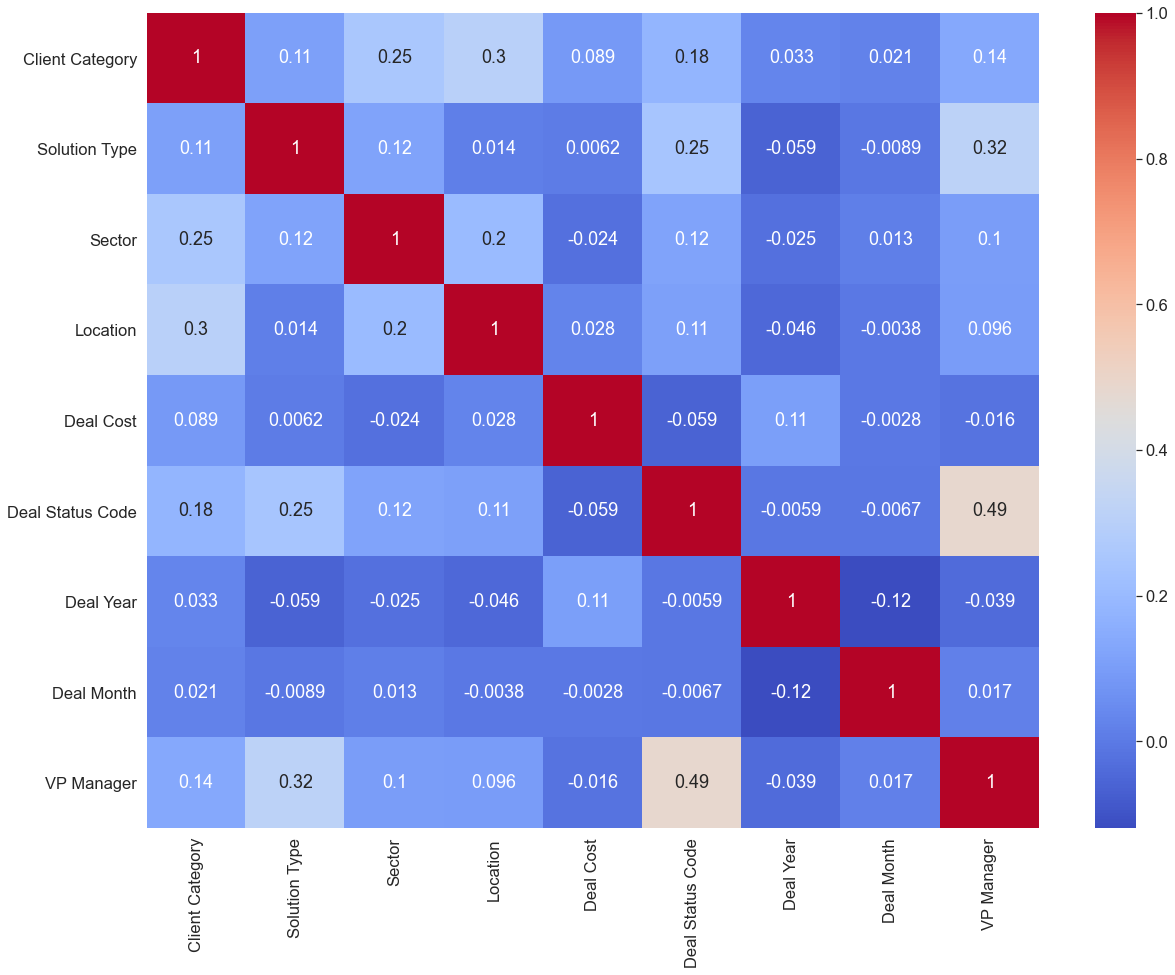

In [137]:
corr_matrix = df2.corr() 

#plot correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True);

In [138]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

df3 = pd.DataFrame(scale.fit_transform(df2.values), columns=df2.columns, index=df2.index)

In [139]:
df3

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,0.725,0.530303,0.666667,0.833333,0.093412,1.0,0.125,0.181818,0.635036
1,0.725,0.530303,0.666667,0.833333,0.464489,1.0,0.125,0.727273,0.635036
2,0.975,0.469697,0.916667,1.000000,0.037255,0.0,0.000,0.636364,0.257560
3,0.975,0.469697,0.916667,1.000000,0.037255,0.0,0.000,0.272727,0.257560
4,0.975,0.803030,0.916667,1.000000,0.050284,0.0,0.000,0.454545,0.257560
...,...,...,...,...,...,...,...,...,...
10056,0.800,0.348485,0.875000,0.833333,0.366856,0.0,1.000,0.181818,0.111575
10057,0.975,0.409091,0.916667,1.000000,0.484676,1.0,1.000,0.181818,0.647550
10058,0.800,0.348485,0.875000,0.833333,0.366856,0.0,1.000,0.090909,0.111575
10059,0.800,0.696970,0.875000,0.833333,1.000000,1.0,1.000,0.000000,0.990615


In [140]:
#Splitting Dependent and Independent variable

X=df3.drop('Deal Status Code',axis=1)  #Independent Variable
y=df3['Deal Status Code'] # Dependent Variable

In [141]:
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn import metrics

In [142]:
#Train-Test Split 20:80 ratio
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=99)

In [143]:
y_train.value_counts(normalize=True)

0.0    0.623616
1.0    0.376384
Name: Deal Status Code, dtype: float64

In [144]:
y_test.value_counts(normalize=True)

0.0    0.636816
1.0    0.363184
Name: Deal Status Code, dtype: float64

In [145]:
X_train.shape , y_train.shape

((8037, 8), (8037,))

In [146]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.01620099, 0.03431627, 0.00323282, 0.00732636, 0.08784685,
       0.        , 0.0091511 , 0.12007357])

In [147]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

VP Manager         0.120074
Deal Cost          0.087847
Solution Type      0.034316
Client Category    0.016201
Deal Month         0.009151
Location           0.007326
Sector             0.003233
Deal Year          0.000000
dtype: float64

<AxesSubplot:>

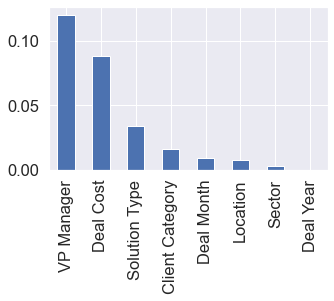

In [148]:
# Identifying the imp features
mutual_info.sort_values(ascending=False).plot.bar(figsize=(5,3))

## MODEL CREATION

--**1.LOGISTIC REGRESSION**

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [150]:
logmodel=LogisticRegression()

In [151]:
#Hyperparameter Optimization-tuning

from sklearn.model_selection import RandomizedSearchCV

params={'penalty':['l1','l2'], 'C':np.logspace(-4,4,20),'solver':['liblinear','sag','saga']}

In [152]:
log_randomcv=RandomizedSearchCV(logmodel,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [153]:
log_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   scoring='roc_auc', verbose=3)

In [154]:
# Identifying best estimator
lg_model=log_randomcv.best_estimator_
lg_model

LogisticRegression(C=1.623776739188721, solver='saga')

In [155]:
print("Train score ", lg_model.score(X_train, y_train))
print("Test Score", lg_model.score(X_test, y_test))

Train score  0.7410725395047904
Test Score 0.746268656716418


In [156]:
#predict:predict class labels for samples in X
lg_model.predict(X_train)
y_pred=lg_model.predict(X_train)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [157]:
#predict probab estimates
pred_proba=lg_model.predict_proba(X_train)
pred_proba

array([[0.52344309, 0.47655691],
       [0.86805327, 0.13194673],
       [0.50557582, 0.49442418],
       ...,
       [0.02859119, 0.97140881],
       [0.89583674, 0.10416326],
       [0.58447108, 0.41552892]])

In [158]:
#coef-coefficient of features in the decision function
lg_model.coef_

array([[ 1.16673883,  1.06010849,  0.46750736,  0.42790157, -0.72639872,
         0.18976275, -0.12391377,  6.6962208 ]])

In [159]:
# Classification report
print("\n")
print("--------------------------Train classification report----------------------------------")
print(classification_report(y_train,y_pred))




--------------------------Train classification report----------------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80      5012
         1.0       0.68      0.59      0.63      3025

    accuracy                           0.74      8037
   macro avg       0.73      0.71      0.72      8037
weighted avg       0.74      0.74      0.74      8037



In [160]:
#Confusion matrix function

def plot_confusion_matrix(cm,classes=None,title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0. , vmax=1. , annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm,vmin=0. , vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

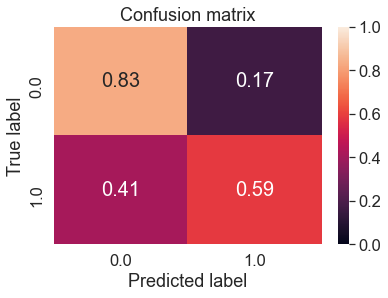

In [161]:
# visualizing cm

cm=confusion_matrix(y_train,y_pred)
cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm,classes=lg_model.classes_, title='Confusion matrix')

In [162]:
prediction_lgtest=lg_model.predict(X=X_test)

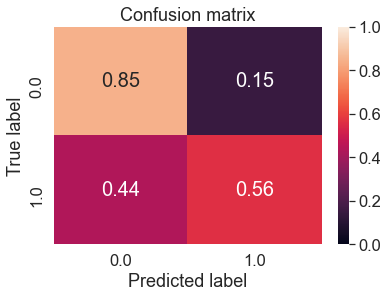

In [163]:
#Confusion Matrix for test
cm=confusion_matrix(y_test,prediction_lgtest)
cm_norm=cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=lg_model.classes_)

In [164]:
lg_model.classes_

array([0., 1.])

In [165]:
cm.sum(axis=1)
cm_norm

array([[0.85078125, 0.14921875],
       [0.4369863 , 0.5630137 ]])

In [166]:
# Calculating FP,FN,TP,TN
FP= cm.sum(axis=0)-np.diag(cm)
FP

FN=cm.sum(axis=1)-np.diag(cm)
FN

TP=np.diag(cm)
TP
TN=cm.sum()-(FP+FN+TP)
TN

#Sensitivity,hit rate,recall or tpr
TPR=TP/(TP+FN)
print("True Positive Rate is:",TPR)

#Precision or positive predicted value
PPV= TP/(TP+FP)
print("The precision is:",PPV)

#False postive rate
FPR=FP/(FP+TN)
print("False Positive Rate is:",FPR)

#false Negative or miss rate
FNR=FN/(FN+TP)
print("False Negative Rate is:",FNR)

#Total averages
print("")
print("The average TPR is:",TPR.sum()/2)
print(" The average precision is:",PPV.sum()/2)
print(" The average FPR is:",FPR.sum()/2)
print(" The average FNR is:",FNR.sum()/2)

True Positive Rate is: [0.85078125 0.5630137 ]
The precision is: [0.7734375  0.68272425]
False Positive Rate is: [0.4369863  0.14921875]
False Negative Rate is: [0.14921875 0.4369863 ]

The average TPR is: 0.7068974743150684
 The average precision is: 0.7280808762458472
 The average FPR is: 0.2931025256849315
 The average FNR is: 0.2931025256849315


In [168]:
log_loss(y_train,pred_proba)

0.5102220143403542

In [169]:
log_loss_lr = log_loss(y_train,pred_proba)

In [170]:
#Logarithmic loss or log loss or cross entropy loss

# Running log loss on training
print("The log loss on training is:",log_loss(y_train,pred_proba))

# Running log loss on testing
pred_proba_t=lg_model.predict_proba(X_test)
print("The log loss on testing is:",log_loss(y_test,pred_proba_t))

The log loss on training is: 0.5102220143403542
The log loss on testing is: 0.5052204434836656


In [171]:
pred_proba_t=lg_model.predict_proba(X_test)
pred_proba_t=pred_proba_t[:,1]

In [172]:
from sklearn.metrics import roc_auc_score
roc_score_lr=roc_auc_score(y_test,pred_proba_t)
print('ROC_AUC_Score:',roc_score_lr)

ROC_AUC_Score: 0.8042583476027398


In [173]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

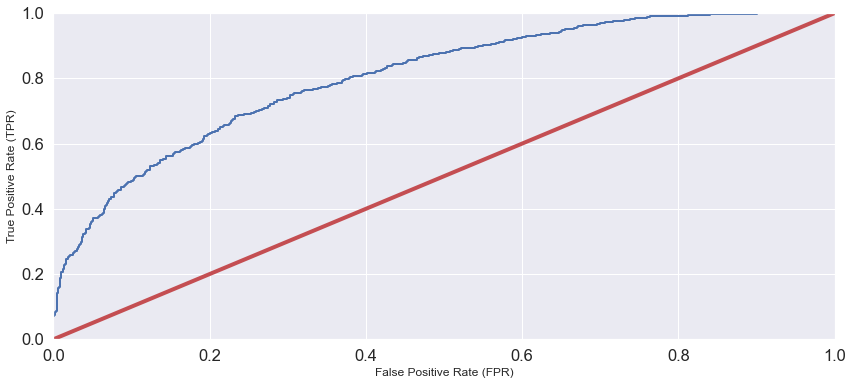

In [174]:
from sklearn.metrics import roc_curve
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred_proba_t)

def plot_roc_curve(false_positive_rate,true_positive_rate,label=None):
    plt.plot(false_positive_rate,true_positive_rate,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)',fontsize=12)
    plt.ylabel('True Positive Rate (TPR)',fontsize=12)
plt.figure(figsize=(14,6))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

--**2.DECISION TREE**

In [175]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [176]:
X=df2.drop(columns=["Deal Status Code"])
y=df2["Deal Status Code"]

In [177]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=99)

In [178]:
dt=DecisionTreeClassifier(random_state=99) 
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

In [180]:
#resulting in overfitting
print("Train score :", dt.score(X_train, y_train))
print("Test score :", dt.score(X_test, y_test))

Train score : 0.9995023018539256
Test score : 0.7955223880597015


In [181]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[100,40,50,30], 
              'max_depth':[9,8,7,10],
              "min_samples_leaf":[33,30,35,32]
             }


tr = DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [9, 8, 7, 10],
                         'min_samples_leaf': [33, 30, 35, 32],
                         'min_samples_split': [100, 40, 50, 30]},
             verbose=1)

In [182]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 35,
 'min_samples_split': 40}

In [183]:
gsearch.best_score_

0.7482870516657063

In [184]:
dt_model=DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_split=30, min_samples_leaf=35)
dt_model.fit(X_train, y_train)
print("Train score :", dt_model.score(X_train, y_train))
print("Test score :", dt_model.score(X_test, y_test))

Train score : 0.7746671643648128
Test score : 0.7577114427860696


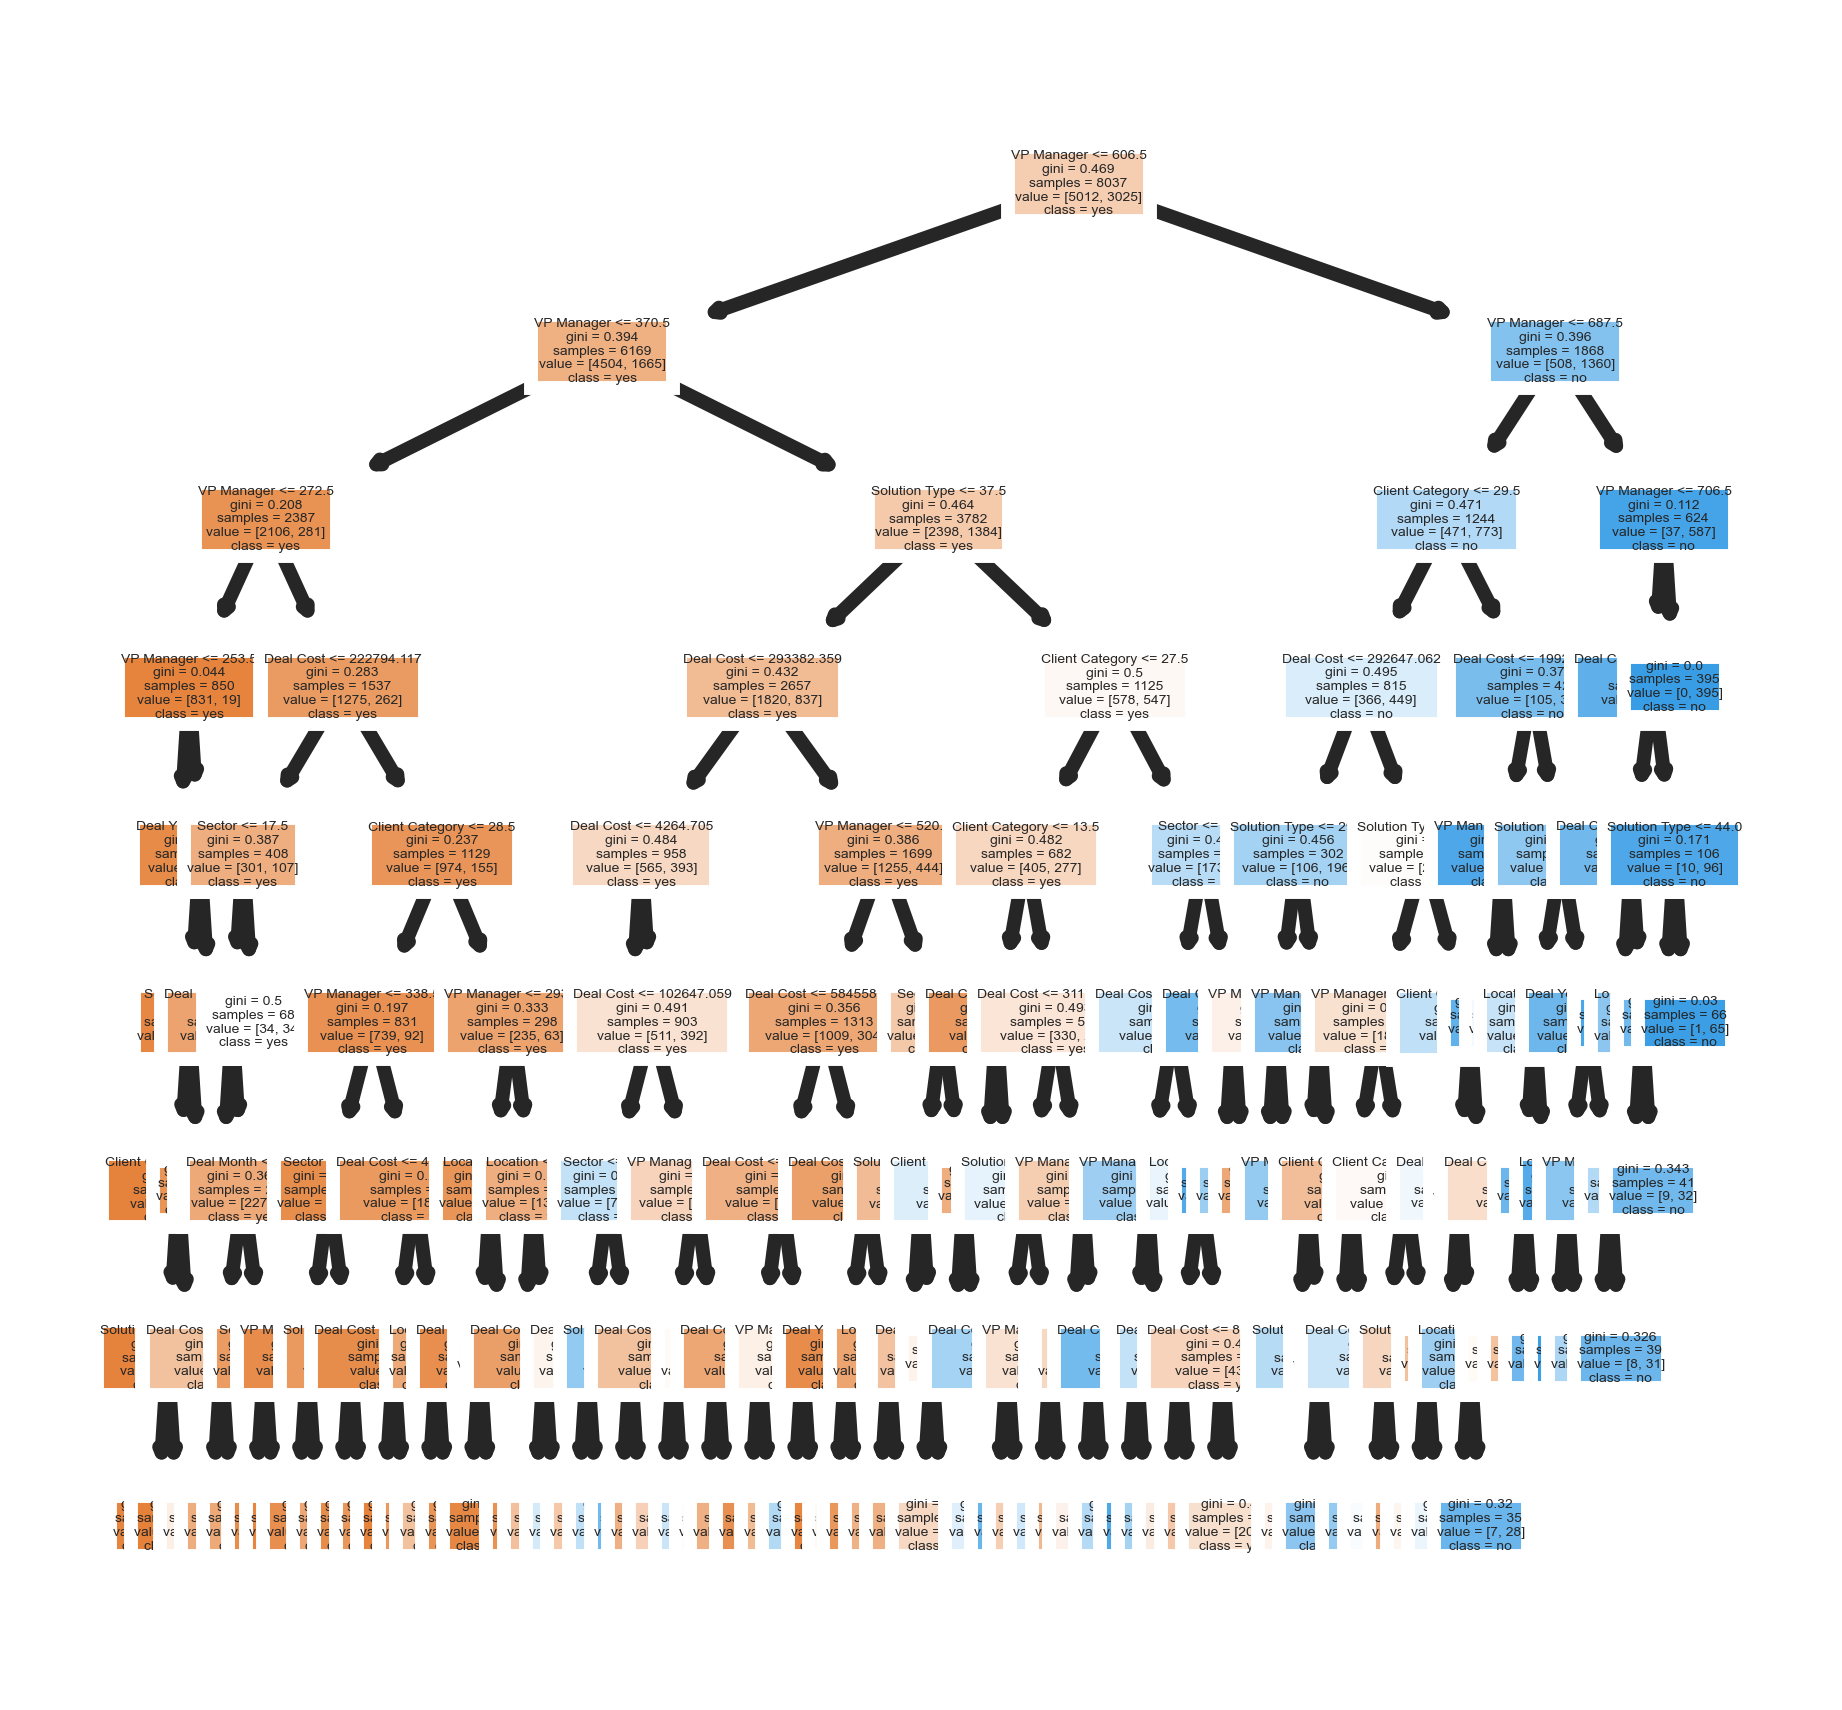

In [185]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train.columns
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=1000)

dt_plot=plot_tree(dt_model,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [186]:
dt_model.predict(X_train)
y_predict=dt_model.predict(X_train)
y_predict

array([1, 0, 0, ..., 1, 0, 0])

In [187]:
#predict probab estimates
dt_proba=dt_model.predict_proba(X_train)
dt_proba

array([[0.45588235, 0.54411765],
       [0.91666667, 0.08333333],
       [0.63888889, 0.36111111],
       ...,
       [0.        , 1.        ],
       [0.84210526, 0.15789474],
       [0.58955224, 0.41044776]])

In [188]:
#evaluating model
#Accuracy on Train
print ("The Training Accuracy is:",dt_model.score(X_train,y_train))

#Accuracy on Test
print ("The Testing Accuracy is:",dt_model.score(X_test,y_test))

# Classification report
print(classification_report(y_train,y_predict))

The Training Accuracy is: 0.7746671643648128
The Testing Accuracy is: 0.7577114427860696
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      5012
           1       0.77      0.57      0.66      3025

    accuracy                           0.77      8037
   macro avg       0.77      0.73      0.74      8037
weighted avg       0.77      0.77      0.77      8037



In [189]:
#Confusion matrix function

def plot_confusion_matrix(cm,classes=None,title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0. , vmax=1. , annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm,vmin=0. , vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

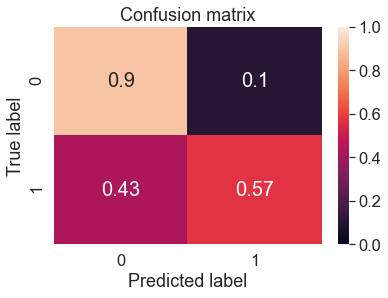

In [190]:
# visualizing cm

cm=confusion_matrix(y_train,y_predict)
cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm,classes=dt_model.classes_, title='Confusion matrix')

In [191]:
prediction_dttest=dt.predict(X=X_test)

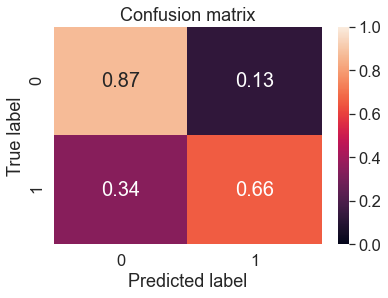

In [192]:
#Confusion Matrix for test
cm=confusion_matrix(y_test,prediction_dttest)
cm_norm=cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=dt_model.classes_)

In [193]:
lg_model.classes_

array([0., 1.])

In [194]:
cm.sum(axis=1)
cm_norm

array([[0.8734375 , 0.1265625 ],
       [0.34109589, 0.65890411]])

In [195]:
cm

array([[1118,  162],
       [ 249,  481]], dtype=int64)

In [196]:
log_loss(y_train,dt_proba)

0.4500135255231527

In [197]:
log_loss_dt=log_loss(y_train,dt_proba)

In [198]:
#Logarithmic loss or log loss or cross entropy loss

# Running log loss on training
print("The log loss on training is:",log_loss(y_train,dt_proba))

# Running log loss on testing
pred_proba_dt=dt_model.predict_proba(X_test)
print("The log loss on testing is:",log_loss(y_test,pred_proba_dt))

The log loss on training is: 0.4500135255231527
The log loss on testing is: 0.5151577205501521


In [199]:
pred_proba_dt=dt_model.predict_proba(X_test)
pred_proba_dt=pred_proba_dt[:,1]

In [200]:
from sklearn.metrics import roc_auc_score
roc_score_dt=roc_auc_score(y_test,pred_proba_dt)
print('ROC_AUC_Score:',roc_score_dt)

ROC_AUC_Score: 0.8152359803082192


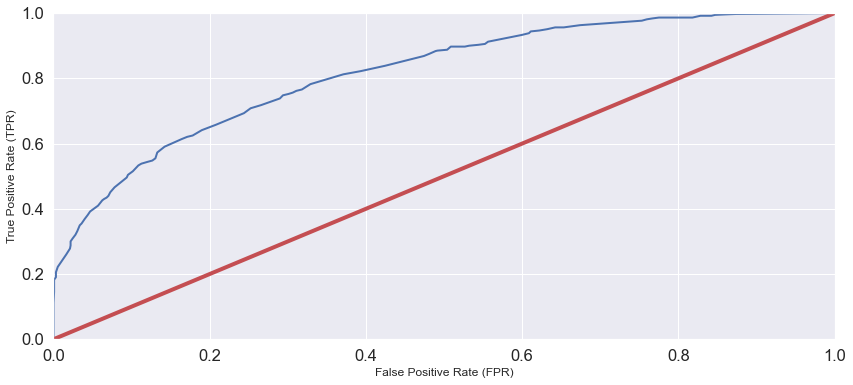

In [201]:
from sklearn.metrics import roc_curve
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred_proba_dt)

def plot_roc_curve(false_positive_rate,true_positive_rate,label=None):
    plt.plot(false_positive_rate,true_positive_rate,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)',fontsize=12)
    plt.ylabel('True Positive Rate (TPR)',fontsize=12)
plt.figure(figsize=(14,6))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

--**3.RANDOM FOREST**

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
from sklearn.model_selection import GridSearchCV

parameters={"n_estimators" : [50,60,70],
            "criterion": ["gini", "entropy"],
            "max_depth" :[10,12, 8],
            "min_samples_split":[4,3,2],
            "min_samples_leaf" :[4,5,3],
            "max_features" :["log", "sqrt"],
            "bootstrap" : [True, False]
           }

rf=RandomForestClassifier()

rf_gs=GridSearchCV(estimator=rf,param_grid=parameters,scoring="accuracy", verbose=True, n_jobs=-1, cv=10)
rf_gs.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 8],
                         'max_features': ['log', 'sqrt'],
                         'min_samples_leaf': [4, 5, 3],
                         'min_samples_split': [4, 3, 2],
                         'n_estimators': [50, 60, 70]},
             scoring='accuracy', verbose=True)

In [204]:
rf_gs.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [205]:
rf=RandomForestClassifier(criterion='gini' ,max_depth=12, n_estimators= 60)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=60)

In [206]:
rf_model=rf.fit(X_train,y_train)
rf_model

RandomForestClassifier(max_depth=12, n_estimators=60)

In [207]:
rf_model.predict(X_train)
y_predictrf=rf_model.predict(X_train)
y_predictrf

array([1, 0, 0, ..., 1, 0, 0])

In [208]:
#predict probab estimates
rf_proba=rf_model.predict_proba(X_train)
rf_proba

array([[0.38560639, 0.61439361],
       [0.85705488, 0.14294512],
       [0.6230061 , 0.3769939 ],
       ...,
       [0.05303459, 0.94696541],
       [0.93544524, 0.06455476],
       [0.71552375, 0.28447625]])

In [209]:
#Accuracy on Train
print ("The Training Accuracy is:",rf_model.score(X_train,y_train))

#Accuracy on Test
print ("The Testing Accuracy is:",rf_model.score(X_test,y_test))

The Training Accuracy is: 0.9066815976110489
The Testing Accuracy is: 0.8054726368159204


In [210]:
print("\n")
print("--------------------------Train classification report----------------------------------")
print(classification_report(y_train,y_predictrf))




--------------------------Train classification report----------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5012
           1       0.97      0.78      0.86      3025

    accuracy                           0.91      8037
   macro avg       0.92      0.88      0.90      8037
weighted avg       0.91      0.91      0.90      8037



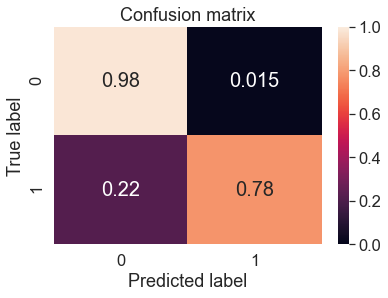

In [211]:
# visualizing cm for training
cm=confusion_matrix(y_train,y_predictrf)
cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm,classes=rf_model.classes_, title='Confusion matrix')

In [212]:
prediction_rftest=rf.predict(X=X_test)

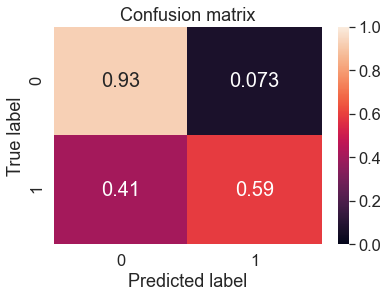

In [213]:
#Confusion Matrix for test
cm=confusion_matrix(y_test,prediction_rftest)
cm_norm=cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=rf_model.classes_)

In [214]:
cm.sum(axis=1)
cm_norm

array([[0.92734375, 0.07265625],
       [0.40821918, 0.59178082]])

In [215]:
cm

array([[1187,   93],
       [ 298,  432]], dtype=int64)

In [216]:
log_loss(y_train,rf_proba)

0.29949009977000424

In [217]:
log_loss_rt =log_loss(y_train,rf_proba)

In [218]:
#Logarithmic loss or log loss or cross entropy loss

# Running log loss on training
print("The log loss on training is:",log_loss(y_train,rf_proba))

# Running log loss on testing
pred_proba_rf=rf_model.predict_proba(X_test)
print("The log loss on testing is:",log_loss(y_test,pred_proba_rf))

The log loss on training is: 0.29949009977000424
The log loss on testing is: 0.4300911132734613


In [219]:
pred_proba_rf=rf_model.predict_proba(X_test)
pred_proba_rf=pred_proba_rf[:,1]

In [220]:
from sklearn.metrics import roc_auc_score
roc_score_rf=roc_auc_score(y_test,pred_proba_rf)
print('ROC_AUC_Score:',roc_score_rf)

ROC_AUC_Score: 0.8743931934931506


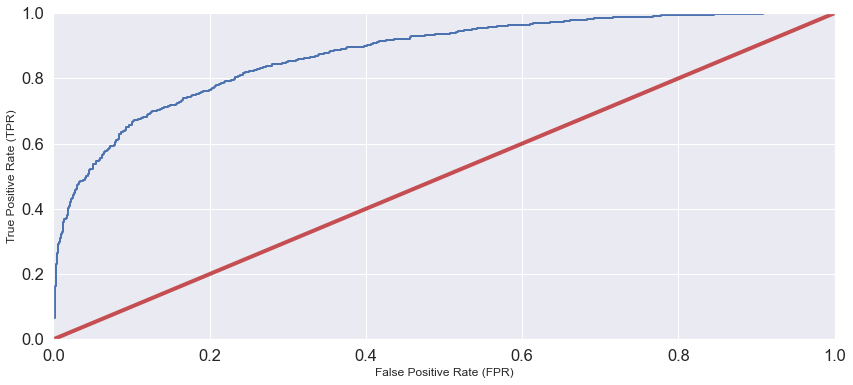

In [221]:
from sklearn.metrics import roc_curve
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred_proba_rf)

def plot_roc_curve(false_positive_rate,true_positive_rate,label=None):
    plt.plot(false_positive_rate,true_positive_rate,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)',fontsize=12)
    plt.ylabel('True Positive Rate (TPR)',fontsize=12)
plt.figure(figsize=(14,6))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

--**3.SVM**

In [222]:
from sklearn import metrics
from sklearn.svm import SVC 

In [223]:
clf = SVC()

In [224]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC()

In [225]:
sv_model=clf.fit(X_train,y_train)
sv_model

SVC()

In [226]:
print("Train score ", clf.score(X_train, y_train))
print("Test Score", clf.score(X_test, y_test))

#Predict the response for test dataset
#y_pred = clf.predict(X_train_scal)

Train score  0.6236157770312306
Test Score 0.6368159203980099


In [227]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [228]:
clf = SVC(# C= 100
        # kernel="linear"
                 gamma = 1
                   # degree = 5
                      )
sv_model = clf.fit(X_train, y_train)

In [229]:
sv_model.predict(X_train)
y_predictsv=sv_model.predict(X_train)
y_predictsv


array([1, 0, 0, ..., 1, 0, 0])

In [231]:
#evaluating model
#Accuracy on Train
print ("The Training Accuracy is:",clf.score(X_train,y_train))

#Accuracy on Test
print ("The Testing Accuracy is:",clf.score(X_test,y_test))

# Classification report
print(classification_report(y_train,y_predictsv))

The Training Accuracy is: 0.999377877317407
The Testing Accuracy is: 0.6447761194029851
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5012
           1       1.00      1.00      1.00      3025

    accuracy                           1.00      8037
   macro avg       1.00      1.00      1.00      8037
weighted avg       1.00      1.00      1.00      8037



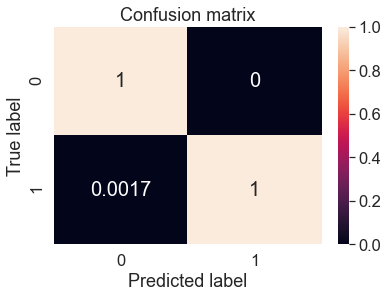

In [232]:
# visualizing cm for training
cm=confusion_matrix(y_train,y_predictsv)
cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm,classes=sv_model.classes_, title='Confusion matrix')

In [233]:
prediction_svtest=clf.predict(X=X_test)

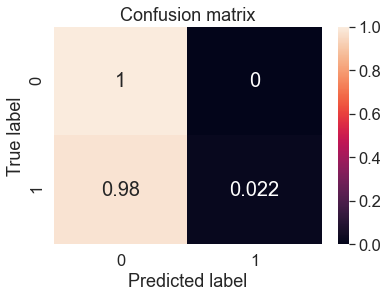

In [234]:
#Confusion Matrix for test
cm=confusion_matrix(y_test,prediction_svtest)
cm_norm=cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=sv_model.classes_)

In [235]:
cm.sum(axis=1)
cm_norm

array([[1.        , 0.        ],
       [0.97808219, 0.02191781]])

In [236]:
cm

array([[1280,    0],
       [ 714,   16]], dtype=int64)

In [237]:
log_loss(y_train,rf_proba)

0.29949009977000424

In [238]:
log_loss_svm = "NA"

In [239]:
from sklearn.metrics import roc_auc_score
roc_score_svm=roc_auc_score(y_test,prediction_svtest)
print('ROC_AUC_Score:',roc_score_svm)

ROC_AUC_Score: 0.510958904109589


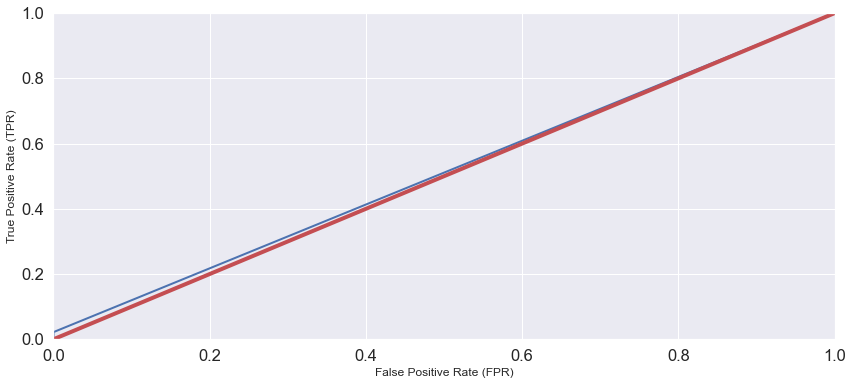

In [240]:
from sklearn.metrics import roc_curve
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,prediction_svtest)

def plot_roc_curve(false_positive_rate,true_positive_rate,label=None):
    plt.plot(false_positive_rate,true_positive_rate,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)',fontsize=12)
    plt.ylabel('True Positive Rate (TPR)',fontsize=12)
plt.figure(figsize=(14,6))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

## COMPARISION OF MODELS

In [241]:
Col_Name=["Model Name","Accuracy","Precision(Weighted)","Log Loss", "ROC"]

In [242]:
Model_Name=["Logistic Regression","Decision Tree","Random Forest","SVM"]

In [243]:
Accuracy=[round(lg_model.score(X_test,y_test),2),round(dt_model.score(X_test,y_test),2),round(rf_model.score(X_test,y_test),2),
         round(sv_model.score(X_test,y_test))]

In [244]:
Precision=[round(precision_recall_fscore_support(y_test,prediction_lgtest,average='weighted')[0],2),
         round(precision_recall_fscore_support(y_test,prediction_dttest,average='weighted')[0],2),
          round(precision_recall_fscore_support(y_test,prediction_rftest,average='weighted')[0],2),
           round(precision_recall_fscore_support(y_test,prediction_svtest,average='weighted')[0],2)]

In [245]:
Log_Loss=[log_loss_lr, log_loss_dt, log_loss_rt, log_loss_svm]

In [246]:
ROC=[roc_score_lr, roc_score_dt, roc_score_rf, roc_score_svm]

In [247]:
comp=(Model_Name,Accuracy,Precision,Log_Loss,ROC)

In [248]:
comp_df=pd.DataFrame(comp,)

In [249]:
comparison_df=pd.DataFrame(data=list(zip(Model_Name,Accuracy,Precision,Log_Loss,ROC)),columns=Col_Name)

In [250]:
comparison_df

,Model Name,Accuracy,Precision(Weighted),Log Loss,ROC
0,Logistic Regression,0.62,0.74,0.510222,0.804258
1,Decision Tree,0.76,0.79,0.450014,0.815236
2,Random Forest,0.81,0.81,0.29949,0.874393
3,SVM,1.00,0.77,NA,0.510959
